# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [2]:
import pandas as pd          
import numpy as np             
import matplotlib.pyplot as plt  
import seaborn as sns         
import random

In [3]:
categories = ['Fitness', 'Tech', 'Family', 'Beauty']

In [4]:
n=500

In [5]:
data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

In [6]:
df = pd.DataFrame(data)

# Print the DataFrame to verify
print(df)   

          Date Category  Likes
0   2021-01-01     Tech   1021
1   2021-01-02     Tech   3669
2   2021-01-03   Beauty   8866
3   2021-01-04     Tech   2994
4   2021-01-05   Beauty   5735
..         ...      ...    ...
495 2022-05-11  Fitness    483
496 2022-05-12   Beauty   7164
497 2022-05-13  Fitness   8561
498 2022-05-14  Fitness   1673
499 2022-05-15  Fitness   4231

[500 rows x 3 columns]


In [7]:
df['Date']=pd.to_datetime(df['Date'])
df['Category']=df['Category'].astype('category')
df['Likes']=df['Likes'].astype(int)
print(df)

          Date Category  Likes
0   2021-01-01     Tech   1021
1   2021-01-02     Tech   3669
2   2021-01-03   Beauty   8866
3   2021-01-04     Tech   2994
4   2021-01-05   Beauty   5735
..         ...      ...    ...
495 2022-05-11  Fitness    483
496 2022-05-12   Beauty   7164
497 2022-05-13  Fitness   8561
498 2022-05-14  Fitness   1673
499 2022-05-15  Fitness   4231

[500 rows x 3 columns]


In [8]:
print(df.isnull().sum())
print(df.describe())

Date        0
Category    0
Likes       0
dtype: int64
             Likes
count   500.000000
mean   5168.654000
std    2889.605755
min       8.000000
25%    2696.000000
50%    5500.500000
75%    7649.500000
max    9908.000000


In [9]:
df['Category']=df['Category'].str.upper().str.strip()
print(df)

          Date Category  Likes
0   2021-01-01     TECH   1021
1   2021-01-02     TECH   3669
2   2021-01-03   BEAUTY   8866
3   2021-01-04     TECH   2994
4   2021-01-05   BEAUTY   5735
..         ...      ...    ...
495 2022-05-11  FITNESS    483
496 2022-05-12   BEAUTY   7164
497 2022-05-13  FITNESS   8561
498 2022-05-14  FITNESS   1673
499 2022-05-15  FITNESS   4231

[500 rows x 3 columns]


In [10]:
print(df['Date'].min(),df['Date'].max())

2021-01-01 00:00:00 2022-05-15 00:00:00


In [11]:
print(df.describe)

<bound method NDFrame.describe of           Date Category  Likes
0   2021-01-01     TECH   1021
1   2021-01-02     TECH   3669
2   2021-01-03   BEAUTY   8866
3   2021-01-04     TECH   2994
4   2021-01-05   BEAUTY   5735
..         ...      ...    ...
495 2022-05-11  FITNESS    483
496 2022-05-12   BEAUTY   7164
497 2022-05-13  FITNESS   8561
498 2022-05-14  FITNESS   1673
499 2022-05-15  FITNESS   4231

[500 rows x 3 columns]>


In [12]:
sns.set(style="whitegrid")
print(df)

          Date Category  Likes
0   2021-01-01     TECH   1021
1   2021-01-02     TECH   3669
2   2021-01-03   BEAUTY   8866
3   2021-01-04     TECH   2994
4   2021-01-05   BEAUTY   5735
..         ...      ...    ...
495 2022-05-11  FITNESS    483
496 2022-05-12   BEAUTY   7164
497 2022-05-13  FITNESS   8561
498 2022-05-14  FITNESS   1673
499 2022-05-15  FITNESS   4231

[500 rows x 3 columns]


In [13]:
df.head()

,Date,Category,Likes
0,2021-01-01,TECH,1021
1,2021-01-02,TECH,3669
2,2021-01-03,BEAUTY,8866
3,2021-01-04,TECH,2994
4,2021-01-05,BEAUTY,5735


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


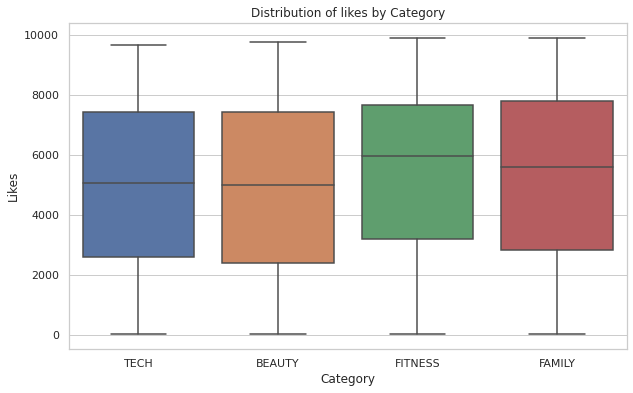

In [15]:
sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Distribution of likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.show()

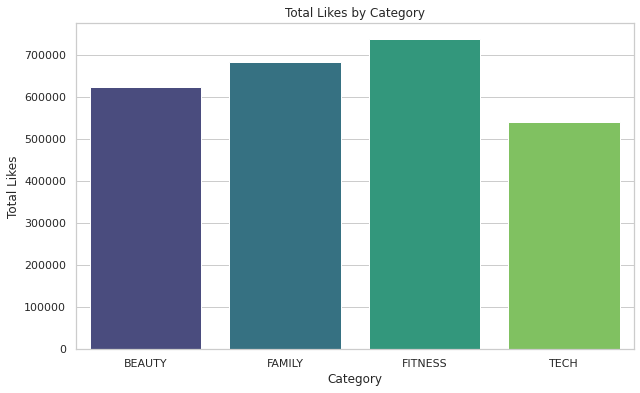

In [16]:
total_likes = df.groupby('Category')['Likes'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Likes', data=total_likes, palette='viridis')
plt.title('Total Likes by Category')
plt.xlabel('Category')
plt.ylabel('Total Likes')
plt.show()

Text(0, 0.5, 'Total likes')

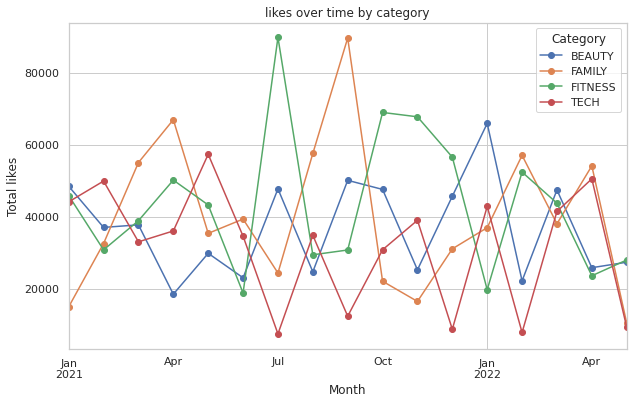

In [17]:
df['Month']=df['Date'].dt.to_period('M')
monthy_likes=df.groupby(['Month','Category'])['Likes'].sum().unstack()
monthy_likes.plot(figsize=(10,6),marker='o')
plt.title('likes over time by category')
plt.xlabel('Month')
plt.ylabel('Total likes')

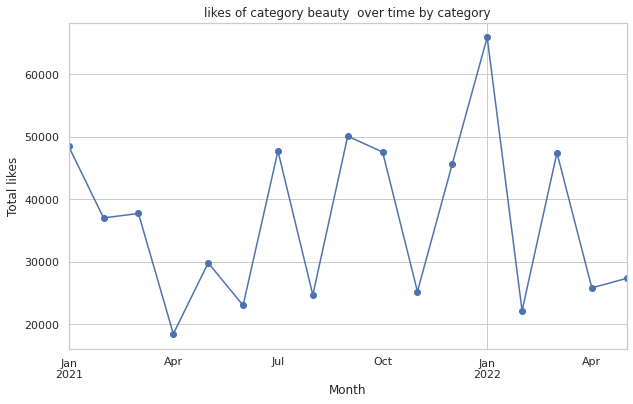

In [18]:
BEAUTY_likes=df[df['Category']=='BEAUTY']
monthly_likes=BEAUTY_likes.groupby('Month')['Likes'].sum()
monthly_likes.plot(figsize=(10,6),marker='o')
plt.title('likes of category beauty  over time by category')
plt.xlabel('Month')
plt.ylabel('Total likes')
plt.show()


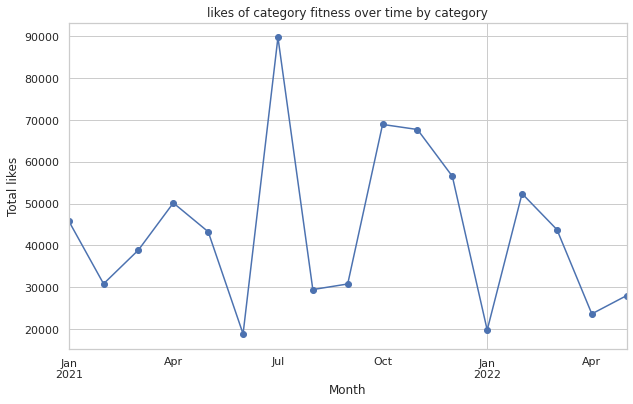

In [19]:
FITNESS_likes=df[df['Category']=='FITNESS']
monthly_likes=FITNESS_likes.groupby('Month')['Likes'].sum()
monthly_likes.plot(figsize=(10,6),marker='o')
plt.title('likes of category fitness over time by category')
plt.xlabel('Month')
plt.ylabel('Total likes')
plt.show()


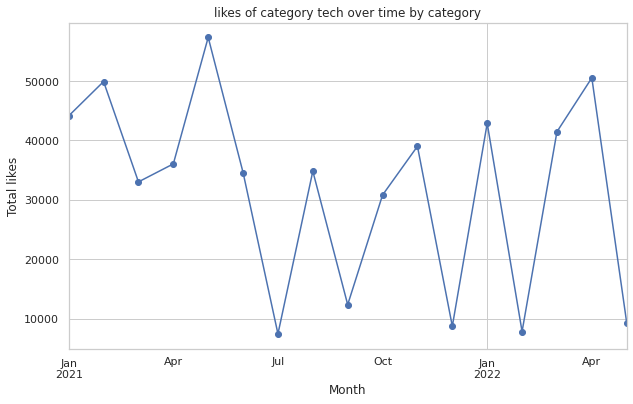

In [20]:
TECH_likes=df[df['Category']=='TECH']
monthly_likes=TECH_likes.groupby('Month')['Likes'].sum()
monthly_likes.plot(figsize=(10,6),marker='o')
plt.title('likes of category tech over time by category')
plt.xlabel('Month')
plt.ylabel('Total likes')
plt.show()


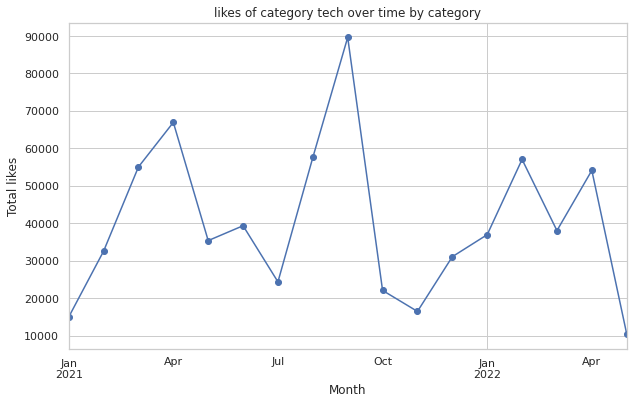

In [21]:
FAMILY_likes=df[df['Category']=='FAMILY']
monthly_likes=FAMILY_likes.groupby('Month')['Likes'].sum()
monthly_likes.plot(figsize=(10,6),marker='o')
plt.title('likes of category tech over time by category')
plt.xlabel('Month')
plt.ylabel('Total likes')
plt.show()
